# Hit结构
## hit结构代码

```c++
#include <TFile.h>
#include <TTree.h>
#include <TString.h>
#include <TRandom3.h>

void hitstruc()
{
	//打开s4.root文件,继承tree
	TFile * ipf = new TFile("../s4cali.root");
	if (ipf->IsZombie())
  	{
      		cout << "Error opening file" << endl;
          	exit(-1);
	}
	ipf->cd();
	TTree * ipt = (TTree *)ipf->Get("tree");

	//ipf中Branch以及参量
	Double_t pedith[48],redith[48],pecali[48];
	for(Int_t i = 0;i<48;i++)
	{
		pedith[i] = -1.0;
		redith[i] = -1.0;
		pecali[i] = -1.0;
	}

	ipt->SetBranchAddress("pedith",&pedith);
	ipt->SetBranchAddress("redith",&redith);
	ipt->SetBranchAddress("pecali",&pecali);


	//新root文件与tree
	TFile * opf = new TFile("../s4hit.root","recreate");
	TTree * opt = new TTree("tree","hit structure");
	
	//新root文件变量,与新Branch
	Int_t pedhit,redhit,pechit;//pedith,redith,pecali的hit数目
	Int_t pedhits[48],redhits[48],pechits[48];//pedith,redith,pecali的hit对应条
	Double_t pedhite[48],redhite[48],pechite[48];//pedith,redith,pecali的hit对应能量
	//继承s4cali.root中内容
	opt->Branch("pedith",&pedith,"pedith[48]/D");
	opt->Branch("redith",&redith,"redith[48]/D");
	opt->Branch("pecali",&pecali,"pecali[48]/D");
	//hit-structure
	opt->Branch("pedhit" ,&pedhit, "pedhit/I");
	opt->Branch("pedhits",&pedhits,"pedhits[pedhit]/I");
	opt->Branch("pedhite",&pedhite,"pedhite[pedhit]/D");
	opt->Branch("redhit" ,&redhit, "redhit/I");
	opt->Branch("redhits",&redhits,"redhits[redhit]/I");
	opt->Branch("redhite",&redhite,"redhite[redhit]/D");
	opt->Branch("pechit" ,&pechit, "pechit/I");
	opt->Branch("pechits",&pechits,"pechits[pechit]/I");
	opt->Branch("pechite",&pechite,"pechite[pechit]/D");


	
	//遍历事件，加入hit-structure
	Long64_t nentries = ipt->GetEntries();
	for(Long64_t jentry = 0; jentry<nentries;jentry++)
	{
		ipt->GetEntry(jentry);
		//初始化
		pedhit = 0;
		redhit = 0;
		pechit = 0;
		for(Int_t i = 0; i < 48; i++)
		{
			pedhits[i] = -1;
			redhits[i] = -1;
			pechits[i] = -1;
			pedhite[i] = -9;
			redhite[i] = -9;
			pechite[i] = -9;
		}
		//hit-structure
		for(Int_t i = 0;i<48;i++)
		{
			//pedith的hit结构
			if(pedith[i]>0)
			{
				pedhits[pedhit] = i;
				pedhite[pedhit] = pedith[i];
				pedhit++;
			}
			if(redith[i]>0)
			{
				redhits[redhit] = i;
				redhite[redhit] = redith[i];
				redhit++;
			}
			if(pecali[i]>0)
			{
				pechits[pechit] = i;
				pechite[pechit] = pecali[i];
				pechit++;
			}
		}
		opt->Fill();
		if(jentry%100000==0) cout<<"process "<<jentry<<" of "<<nentries<<endl;
	}
	opt->Write();
	opf->Close();
	ipf->Close();
}
```

## check 连续化后未hit结构数据

In [1]:
TFile * ipf = new TFile("s4hit.root","read");
TTree * tree = (TTree*)ipf->Get("tree");
TCanvas * c1 = new TCanvas();

**整个事件中只有x面有一个有效信息**

In [2]:
tree->Scan("pedith:redith","","",1,1);//第4参数-事件数，第5参数-起始事件编号
//jupyter上的Scan必须指定第4个参数(事件数)

***********************************************
*    Row   * Instance *    pedith *    redith *
***********************************************
*        1 *        0 * -9.781761 * -9.232249 *
*        1 *        1 * -9.363287 * -9.299579 *
*        1 *        2 * -9.131201 * -9.684457 *
*        1 *        3 * -9.357575 * -9.266213 *
*        1 *        4 * -9.819446 * -9.505955 *
*        1 *        5 * -9.074466 * -9.765425 *
*        1 *        6 * -9.614255 * -9.990809 *
*        1 *        7 * -9.381058 * -9.732783 *
*        1 *        8 * -9.774929 * -9.882472 *
*        1 *        9 * -9.975836 * -9.275215 *
*        1 *       10 * 983.27258 * -9.055889 *
*        1 *       11 * -9.365744 * -9.812461 *
*        1 *       12 * -9.068411 * -9.613469 *
*        1 *       13 * -9.366420 * -9.532057 *
*        1 *       14 * -9.415022 * -9.208433 *
*        1 *       15 * -9.876484 * -9.601631 *
*        1 *       16 * -9.446665 * -9.997487 *
*        1 *       17 * -9.372313 * -9.5

Type <CR> to continue or q to quit ==> 

**整个事件中x，y面都有一个有效信息**

In [3]:
tree->Scan("pedith:redith","","",1,2);

***********************************************
*    Row   * Instance *    pedith *    redith *
***********************************************
*        2 *        0 * -9.661585 * -9.287572 *
*        2 *        1 * -9.868346 * -9.941912 *
*        2 *        2 * -9.309483 * -9.942850 *
*        2 *        3 * -9.717278 * -9.611331 *
*        2 *        4 * -9.258963 * -9.070067 *
*        2 *        5 * -9.128268 * -9.535326 *
*        2 *        6 * -9.899644 * -9.194367 *
*        2 *        7 * -9.296846 * -9.745367 *
*        2 *        8 * 978.41721 * -9.094707 *
*        2 *        9 * -9.767414 * -9.397040 *
*        2 *       10 * -9.920648 * -9.738355 *
*        2 *       11 * -9.604351 * -9.872091 *
*        2 *       12 * -9.687770 * -9.302855 *
*        2 *       13 * -9.655242 * -9.524907 *
*        2 *       14 * -9.078307 * -9.168593 *
*        2 *       15 * -9.563022 * -9.222491 *
*        2 *       16 * -9.648344 * -9.788813 *
*        2 *       17 * -9.558036 * -9.1

Type <CR> to continue or q to quit ==> 

In [4]:
tree->Scan("pedith:redith","pedith>0&& redith>0","",1000,1);

***********************************************
*    Row   * Instance *    pedith *    redith *
***********************************************
*       54 *        1 * 1139.7651 * 876.45273 *
*      124 *       15 * 914.95815 * 156.13581 *
*      198 *       22 * 1057.4589 * 794.56490 *
*      305 *       35 * 1031.5943 * 106.69558 *
*      313 *       12 *  946.1501 * 710.26927 *
*      395 *       35 * 377.51268 * 157.08704 *
*      805 *       41 * 886.34461 * 822.60018 *
*      812 *       20 * 1066.4174 * 79.331253 *
*      838 *       40 * 1392.3979 * 1307.4033 *
*      958 *       22 * 1415.5214 * 1350.1644 *
***********************************************
==> 10 selected entries


In [5]:
tree->Scan("pedith:redith","","",1,54);

***********************************************
*    Row   * Instance *    pedith *    redith *
***********************************************
*       54 *        0 * -9.826008 * 212.10953 *
*       54 *        1 * 1139.7651 * 876.45273 *
*       54 *        2 * -9.764876 * -9.730625 *
*       54 *        3 * -9.405647 * -9.983003 *
*       54 *        4 * -9.342662 * -9.525582 *
*       54 *        5 * -9.613940 * -9.292421 *
*       54 *        6 * -9.532611 * -9.801842 *
*       54 *        7 * -9.305538 * -9.736659 *
*       54 *        8 * -9.365081 * -9.152914 *
*       54 *        9 * -9.131626 * -9.207486 *
*       54 *       10 * -9.978078 * -9.056383 *
*       54 *       11 * -9.309735 * -9.684857 *
*       54 *       12 * -9.731006 * -9.050527 *
*       54 *       13 * -9.654685 * -9.707806 *
*       54 *       14 * -9.692305 * -9.455542 *
*       54 *       15 * -9.194826 * -9.155084 *
*       54 *       16 * -9.982224 * -9.725243 *
*       54 *       17 * -9.965411 * -9.8

Type <CR> to continue or q to quit ==> 

## hit结构数据

In [6]:
tree->Print();

******************************************************************************
*Tree    :tree      : hit structure                                          *
*Entries :  5766176 : Total =      7024613419 bytes  File  Size = 5154844349 *
*        :          : Tree compression factor =   1.36                       *
******************************************************************************
*Br    0 :pedith    : pedith[48]/D                                           *
*Entries :5766176 : Total  Size= 2214265295 bytes  File Size  = 1476426958 *
*Baskets :      574 : Basket Size=   25600000 bytes  Compression=   1.50     *
*............................................................................*
*Br    1 :redith    : redith[48]/D                                           *
*Entries :5766176 : Total  Size= 2214265295 bytes  File Size  = 1488544785 *
*Baskets :      574 : Basket Size=   25600000 bytes  Compression=   1.49     *
*.......................................................

In [7]:
tree->Scan("pedhit:pedhits:pedhite:redhit:redhits:redhite","","",10,1);

***********************************************************************************************
*    Row   * Instance *    pedhit *   pedhits *   pedhite *    redhit *   redhits *   redhite *
***********************************************************************************************
*        1 *        0 *         1 *        10 * 983.27258 *         0 *           *           *
*        2 *        0 *         1 *         8 * 978.41721 *         2 *        42 * 623.91045 *
*        2 *        1 *         1 *           *           *         2 *        43 * 287.93490 *
*        3 *        0 *         1 *        27 * 928.51801 *         2 *         4 * 740.94724 *
*        3 *        1 *         1 *           *           *         2 *         5 * 169.29431 *
*        4 *        0 *         0 *           *           *         2 *         1 * 670.01912 *
*        4 *        1 *         0 *           *           *         2 *         2 * 379.37159 *
*        5 *        0 *         1 *     

**观察事件多重性分布**

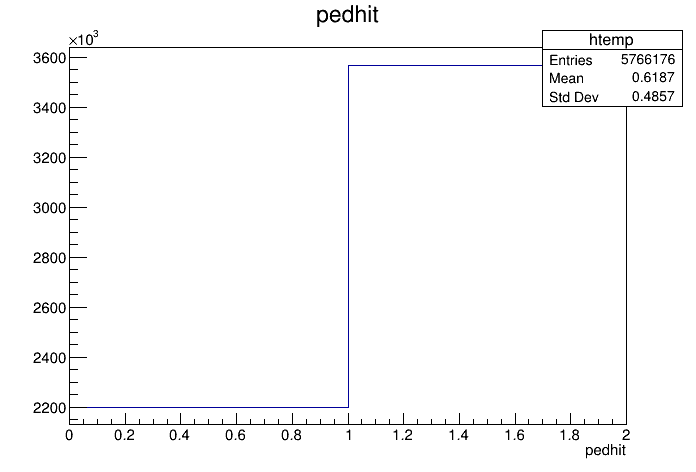

In [8]:
tree->Draw("pedhit");
c1->Draw();

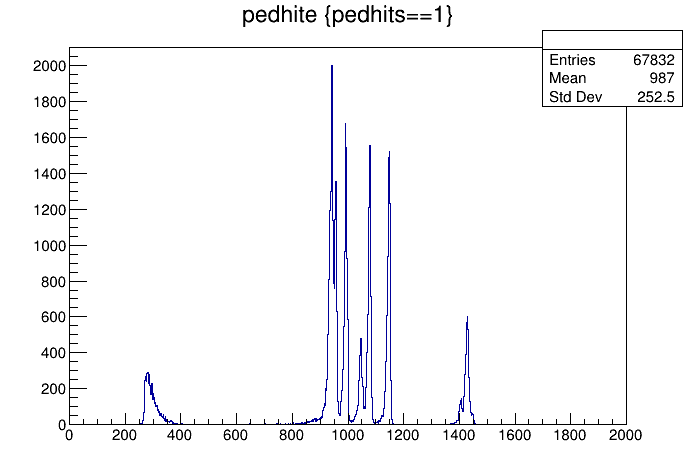

In [9]:
tree->Draw("pedhite>>(1000,0,2000)","pedhits==1");
c1->Draw();

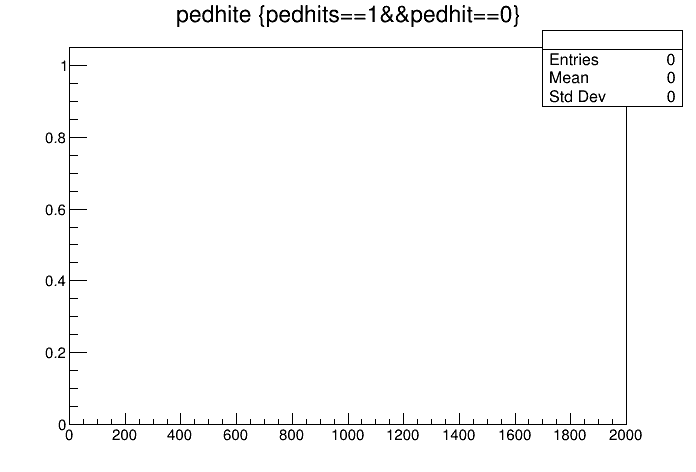

In [10]:
tree->Draw("pedhite>>(1000,0,2000)","pedhits==1&&pedhit==0");
c1->Draw();

**观察pie和ring的能量关联**

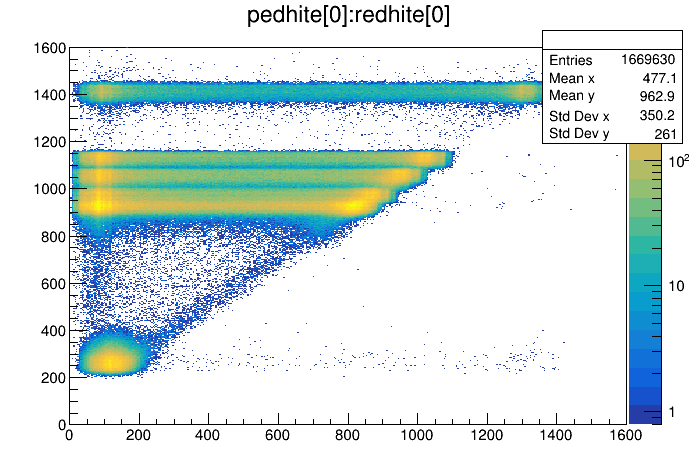

In [11]:
tree->Draw("pedhite[0]:redhite[0]>>(400,0,1600,400,0,1600)","","colz");
gPad->SetLogz();
c1->Draw();

- 用Scan来观察，图上显示的是哪些条之间的能量关联

In [12]:
tree->Scan("pedhits:pedhite:redhits:redhite","","",10,1);

***********************************************************************
*    Row   * Instance *   pedhits *   pedhite *   redhits *   redhite *
***********************************************************************
*        1 *        0 *        10 * 983.27258 *           *           *
*        2 *        0 *         8 * 978.41721 *        42 * 623.91045 *
*        2 *        1 *           *           *        43 * 287.93490 *
*        3 *        0 *        27 * 928.51801 *         4 * 740.94724 *
*        3 *        1 *           *           *         5 * 169.29431 *
*        4 *        0 *           *           *         1 * 670.01912 *
*        4 *        1 *           *           *         2 * 379.37159 *
*        5 *        0 *        44 * 1402.5682 *           *           *
*        6 *        0 *           *           *        27 * 58.482711 *
*        6 *        1 *           *           *        28 * 854.51448 *
*        7 *        0 *           *           *        20 * 240.

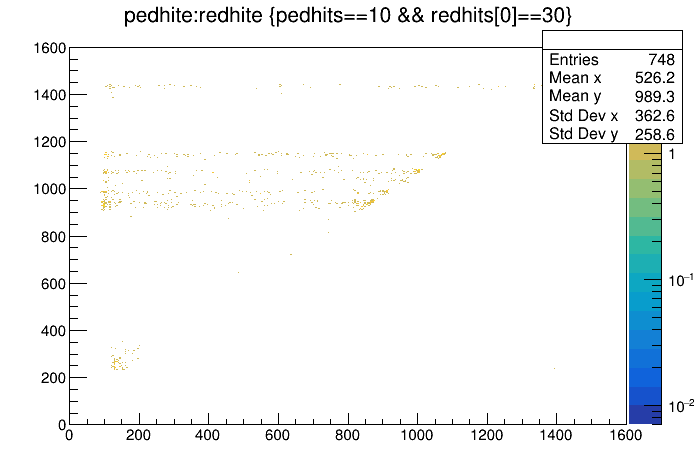

In [13]:
tree->Draw("pedhite:redhite>>(400,0,1600,400,0,1600)","pedhits==10 && redhits[0]==30","colz");//用Scan来观察，图上显示的是哪些条之间的能量关联
gPad->SetLogz();
c1->Draw();

**观察ring的相邻条能量关联**

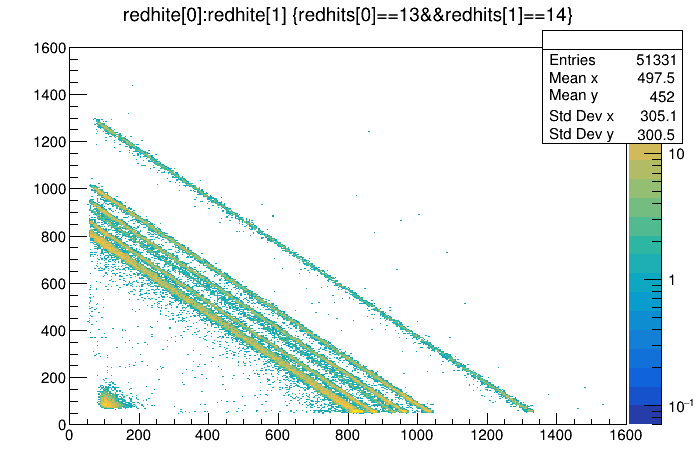

In [14]:
tree->Draw("redhite[0]:redhite[1]>>(400,0,1600,400,0,1600)","redhits[0]==13&&redhits[1]==14","colz");
gPad->SetLogz();
c1->Draw();

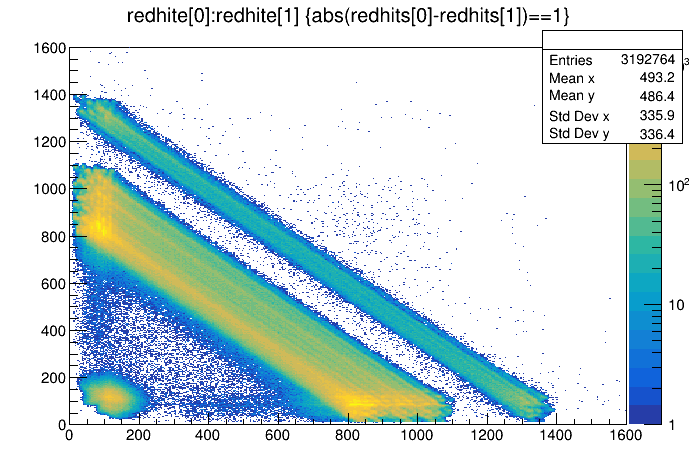

In [15]:
tree->Draw("redhite[0]:redhite[1]>>(400,0,1600,400,0,1600)","abs(redhits[0]-redhits[1])==1","colz");
gPad->SetLogz();
c1->Draw();

**观察pie的所有条的能量分布**
- 刻度前

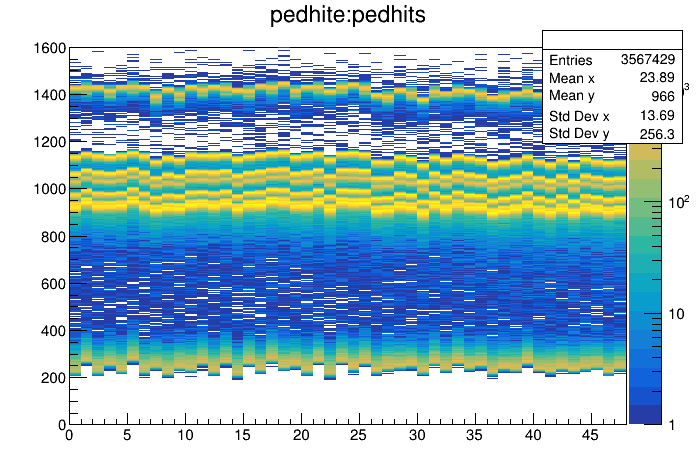

In [16]:
tree->Draw("pedhite:pedhits>>(48,0,48,800,0,1600)","","colz");
c1->Draw();

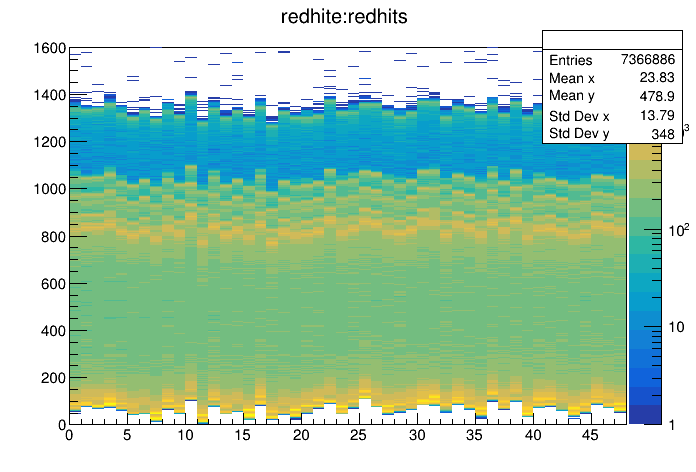

In [17]:
tree->Draw("redhite:redhits>>(48,0,48,800,0,1600)","","colz");
c1->Draw();

- 刻度后

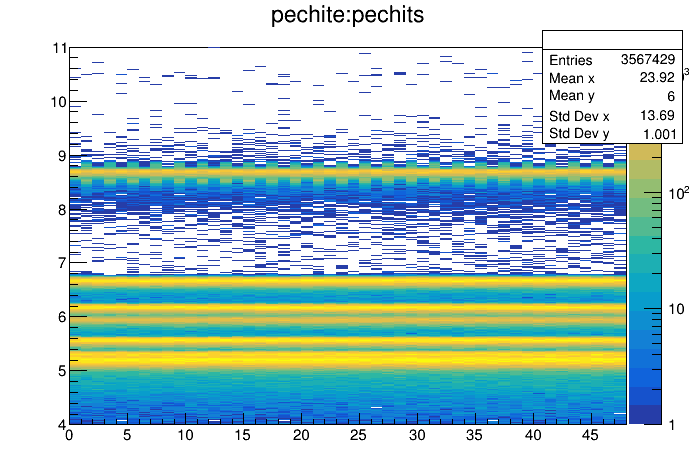

In [18]:
tree->Draw("pechite:pechits>>(48,0,48,700,4,11)","","colz");
c1->Draw();

In [19]:
!jupyter nbconvert homework3.1_3_hitstuc.ipynb --to html

[NbConvertApp] Converting notebook homework3.1_3_hitstuc.ipynb to html


